In [1]:
#fig, ax = plt.subplots(figsize=(8, 3))
import pickle as pkl
import os
xs = []
xfiles = [f for f in os.listdir(".") if f != "s.pkl" and f.endswith(".pkl")]
for p in xfiles:
    with open(f"{p}", "rb") as f:
        x = pkl.load(f)
    xs.append(x)
    print(p)
with open(f"s.pkl", "rb") as f:
    s = pkl.load(f)

9.pkl
1625.pkl
28.pkl
514.pkl
36.pkl
31.pkl
33.pkl
27.pkl
196.pkl
222.pkl
1761.pkl
56.pkl


FileNotFoundError: [Errno 2] No such file or directory: 's.pkl'

NameError: name 's' is not defined

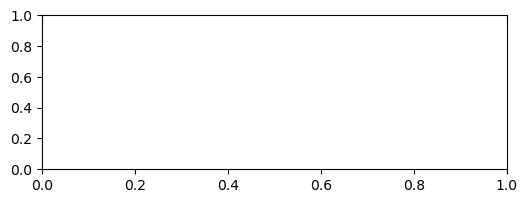

In [2]:
RAD_TO_MRAD = 1000
M_TO_MM = 1000
SEPTA_X_MM = -76.1
SEPTA_X_HEIGHT = -106.1 - SEPTA_X_MM
SEPTA_ELEMENT_INDEX = 1845
SEPTA_ELEMENT_S = 214.6198900000004

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize=(6, 2))
# Nominal
for line in xs[0][:100]:
    if min(line)*M_TO_MM > SEPTA_X_MM:
        bump = ax.plot(s[0], line*M_TO_MM, 'k-', alpha=1, lw=2, label="Bumped Trajectory")
        break
# Extracted
for x in xs:
    for line in x:
        print(min(line)*M_TO_MM)
        #if min(line)*M_TO_MM < SEPTA_X_MM:
        #    extr = ax.plot(s[0][:SEPTA_ELEMENT_INDEX], line[:SEPTA_ELEMENT_INDEX]*M_TO_MM, 'r-', alpha=0.7, lw=2, label="Extraction Trajectory")

ax.set_xlim(50, 250)
ax.set_ylim(-110, 70)
#ax.axvline(SEPTA_ELEMENT_S, color='blue', ls='--', label="SMH57 Septum")
#ax.axhline(y=SEPTA_X_MM, color='blue', ls='--', label="SMH57 Aperture")

aperture = Rectangle(
    xy = (SEPTA_ELEMENT_S, SEPTA_X_MM),
    width = 20,
    height = SEPTA_X_HEIGHT,
    fc='blue',
    alpha=.5
)

frame = Rectangle(
    xy = (SEPTA_ELEMENT_S, -72.1),
    width = 20,
    height = -4,
    fc='black'
)
ax.add_artist(aperture)

ax.add_artist(frame)


ax.set_xlabel(r"Longitudinal position $s$ [m]")
ax.set_ylabel(r"Transverse position $x$ [mm]")

